In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import numpy as np
from collections import defaultdict
sns.set_style("darkgrid")


In [2]:
params = {'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large'}       ###'axes.titlesize':'xx-large'
pylab.rcParams.update(params)

In [3]:
# create a dictionary for easy access to data sets
d = {'L':'linear', 'CO':'cosine', 'C':'clustered'}
rf_df = defaultdict(list)

for key,value in d.items():
    df = pd.read_csv('/Users/zihaoxu/R_repos/BLB-RF-Sim/CSV/MSE~ntree_'+value+'.csv')
    df.drop('Unnamed: 0', axis = 1, inplace = True)
    rf_df['type'].append(value)
    rf_time = df.loc[len(df)-1,'time']
    rf_MSE = df.loc[len(df)-1,'MSE']
    rf_df['rf_time'].append(rf_time)
    rf_df['rf_MSE'].append(rf_MSE)
    df.drop(len(df)-1, axis = 0, inplace = True)
    df['time'] = df['time']/rf_time
    df['MSE'] = df['MSE']/rf_MSE
    df['data_type'] = value
    d[key] = df

In [4]:
d['L'].head()

,n,gamma,s,ntree,time,MSE,data_type
0,10000,0.5,5,25,0.003511,5.106177,linear
1,10000,0.5,5,50,0.005942,4.995302,linear
2,10000,0.5,5,75,0.008858,4.968547,linear
3,10000,0.5,5,100,0.011077,5.076485,linear
4,10000,0.5,5,125,0.013870,4.990888,linear


In [5]:
# plot the RMSE~s graph on a given ax, with a given data structure
def plot_on_ax(ax, df):
    # Find the point at which the MSE converges
    def findStopMSE(df):
        index_to_be_used = []
        for ga in df['gamma'].unique():
            ga_df = df[df.gamma==ga]
            ga_index = list(ga_df.index)
            for ind in ga_index:
                if ind == min(ga_index):
                    index_to_be_used.append(ind) 
                else:
                    pct_change = (ga_df.loc[ind,'MSE'] - ga_df.loc[ind-1,'MSE']) / ga_df.loc[ind-1,'MSE']
                    if pct_change <= -0.001:
                        index_to_be_used.append(ind)
                    else:
                        break
                      
        new = df.loc[index_to_be_used, :]
        new.index = range(len(new))
        return(new)
    stop_df = findStopMSE(df)

    color_dict = {.5:'blue', .6:'g', .7:'r', .8:'purple', .9:'orange',1:'orange'}
    for ga in stop_df['gamma'].unique():
        temp = stop_df[stop_df['gamma']==ga]
        minMSE = min(temp.MSE)
        minRow = temp[temp.MSE==minMSE]
        ax.scatter(minRow['ntree'], minRow['MSE'], c = color_dict[ga], marker = 's', label = None)

    for ga in df['gamma'].unique():
        temp = df[df['gamma']==ga]
        ax.semilogy(temp['ntree'], temp['MSE'], c = color_dict[ga], label = "gamma = " + str(ga))
    if df['data_type'][0]=='linear':
        ax.legend(loc = 1)
    elif df['data_type'][0]=='cosine':
        ax.set_xlabel('ntree (number of BLB decision trees)')
    else:
        ax.set_ylabel('RMSE')
    #ax.legend(loc = 1)
    #ax.set_xlabel('s (number of Little Random Forests)')
    #ax.set_ylabel('RMSE')
    #ax.set_ylim(1,100)
    #ax.set_width(15)
    ax.set_title(str(df['data_type'][0]) + ', n = 10000')
    sns.despine()

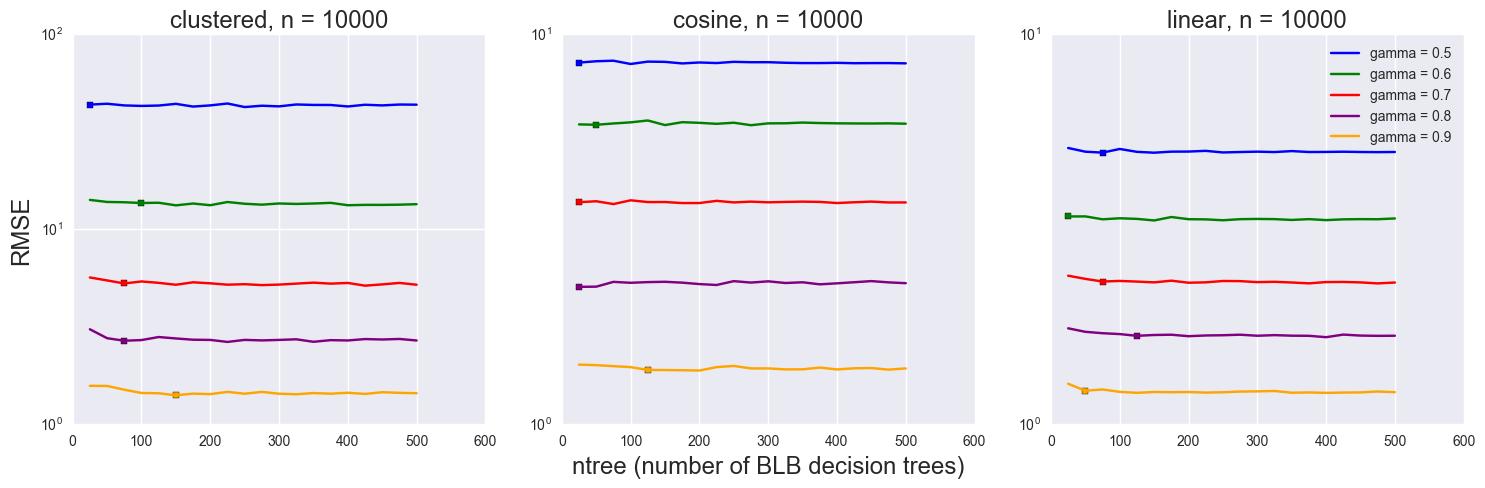

In [8]:
# Figure: MSE ~ s for three data structures

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize = (15,5))
plot_on_ax(ax1, d['C'])
plot_on_ax(ax2, d['CO'])
plot_on_ax(ax3, d['L'])
plt.tight_layout()
#fig.subplots_adjust(left=0.01,right=2,bottom=0.1,top=0.9)

fig
#plt.savefig('/Users/zihaoxu/R_repos/BLB-RF-Sim/Plots/MSE~ntree.png', dpi = 300, fmt = 'png')